# multivariate exploration of the geometry corpus

This is basicaly a raw exploration of the various info we can get from our corpus about wikipedia pages linked by the [`List of geometry topics` page](http://en.wikipedia.org/wiki/List_of_geometry_topics?oldformat=true). The aim of this study is to build an indicator allowing us to order pages by difficulty level.

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import json
import codecs

import math

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# network = json.load(codecs.open("data/wikipedia-geometry/network.json","r", "utf-8-sig"))
# specialization = json.load(codecs.open("data/wikipedia-geometry/specialization.json","r", "utf-8-sig"))

# print network

# print len(network["nodes"])


## data source preview

In [2]:
# for n in network["nodes"]:
#     titles.append(n["id"])

table = pd.read_csv("data/wikipedia-geometry/final.csv", encoding="UTF-8")

#table.head(25) ## always this stupid utf-8 problem...

table = table.set_index("pagename")

table.head(10)


,average word length,hidden users,length,number of backlinks,number of backlinks from ns 0,number of categories,number of links,number of revisions,number of revisions by IP,number of revisions by alive registered user,quality of the article,specialization,unique ip users,unique registered users,unique users,words
pagename,,,,,,,,,,,,,,,,
2D computer graphics,5.912321,0,24124,0,0,7,403,370,124,246,4,0.1909,82,139,221,3490
3D computer graphics,6.360368,0,8803,0,0,8,195,893,368,525,4,0.0627,258,240,498,1196
3-sphere,5.071429,0,17595,0,0,7,116,277,59,218,4,0.3721,44,117,161,2898
Affine geometry,5.424357,0,15245,0,0,1,97,205,40,165,3,0.3904,30,82,112,2373
Algebraic geometry,5.734462,0,46919,1375,1009,1,379,626,189,437,4,0.1887,153,213,366,6967
Altitude (triangle),5.543959,0,12728,0,0,2,59,356,158,198,3,0.0635,117,128,245,1945
Analytic geometry,5.544270,0,29122,0,0,1,193,477,191,286,4,0.0972,150,176,326,4450
Angle,5.132834,0,32780,0,0,11,192,1742,704,1038,4,0.0337,484,468,952,5345
Angle trisection,5.515563,0,14862,0,0,7,163,434,110,324,3,0.2845,67,127,194,2281


## analysis

### raw distribution of specialization

The specialization indicator ($spe(wp,d)$) is a first attempt at quantifying the difficulty of pages.

- $n_{wp}$ is the number of revisions by registered users
- $i_{wp}$ is the number of revisions by unregistered users (IP)
- $P(d,v)$

\begin{align}
spe(wp, d) = \frac{ P(d, n_wp) - P(d,i_wp) }{ |d| + 1 }
\end{align}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107b56950>]], dtype=object)

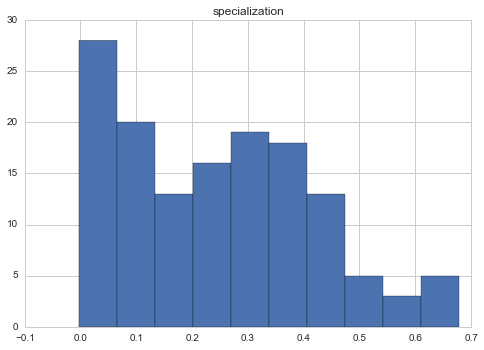

In [3]:
table.hist("specialization")

## correlation matrix

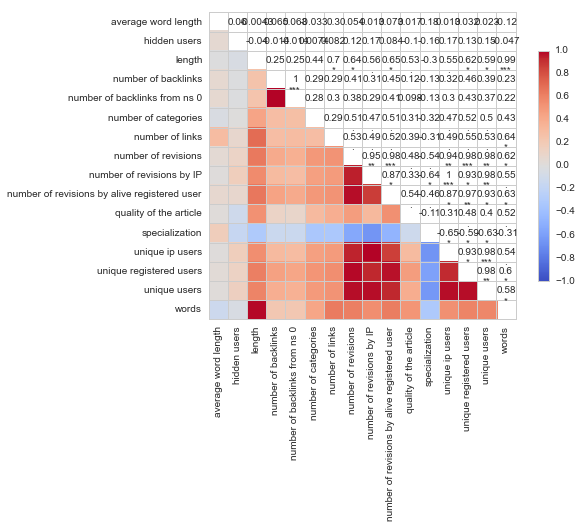

In [4]:
sns.corrplot(table,diag_names=False)

### links x specialization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1083c0190>]], dtype=object)

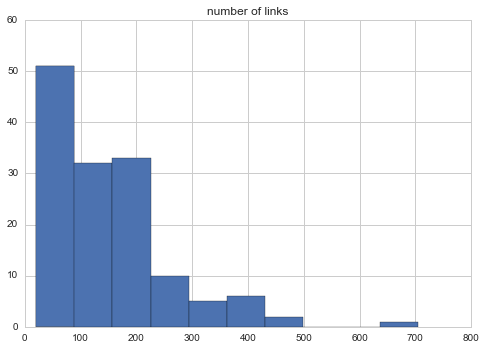

In [5]:
table.hist("number of links")

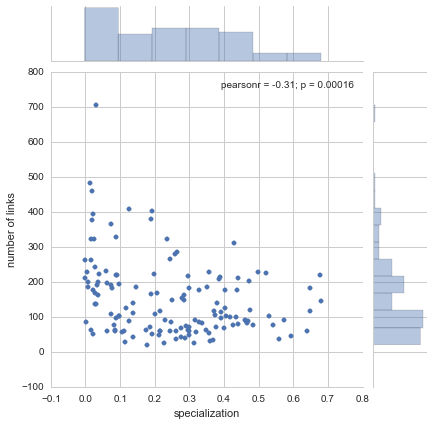

In [6]:
sns.jointplot(table.specialization, table["number of links"])

## quality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108ab0790>]], dtype=object)

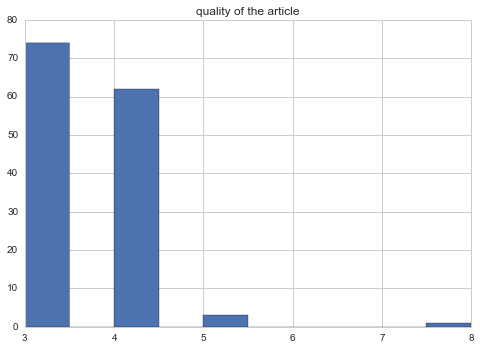

In [7]:
table.hist("quality of the article")

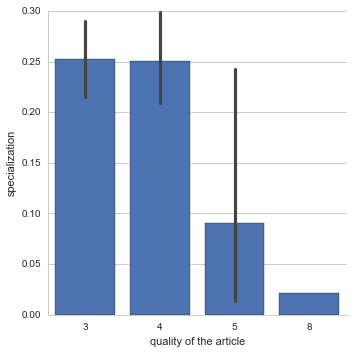

In [8]:
g = sns.factorplot("quality of the article", "specialization", data=table, kind="bar")
#g.despine()

g
#sns.jointplot(table.specialization, table["quality of the article"])

## word lengths

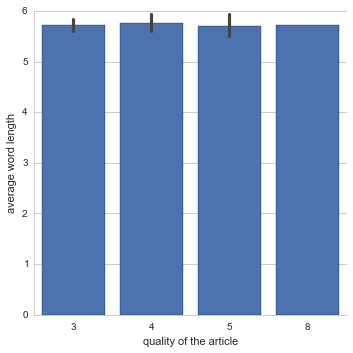

In [9]:
g = sns.factorplot("quality of the article", "average word length", data=table, kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109117890>]], dtype=object)

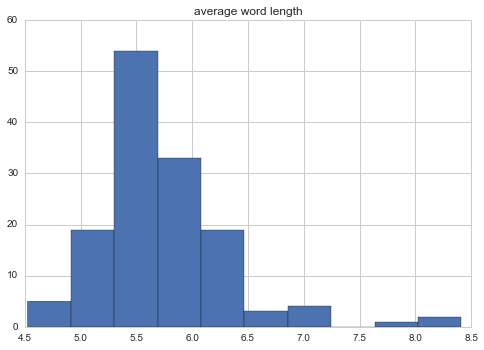

In [10]:
table.hist("average word length")

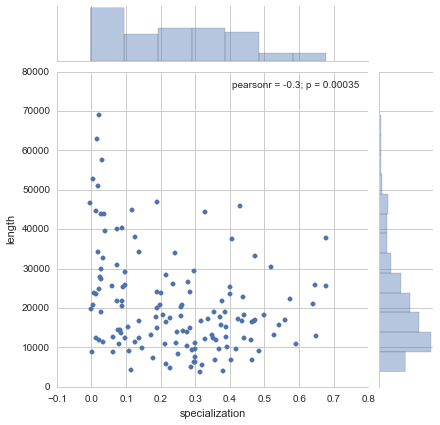

In [11]:
sns.jointplot(table.specialization, table["length"])

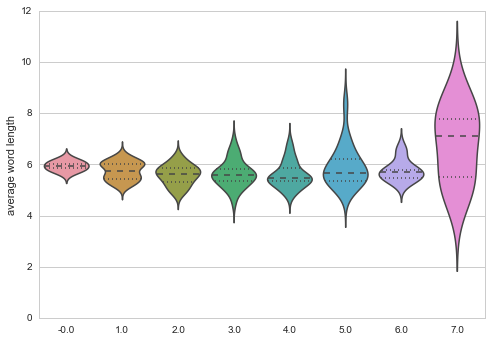

In [12]:
sns.violinplot(table["average word length"], [ math.ceil(x * 10) for x in table["specialization"]])

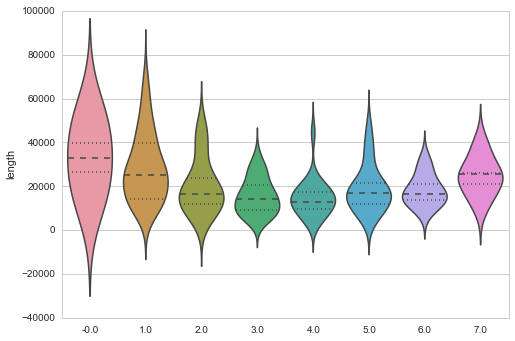

In [13]:
sns.violinplot(table["length"], [ math.ceil(x * 10) for x in table["specialization"]])

## length x revisions

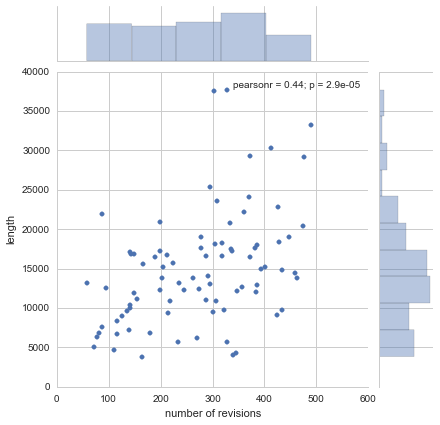

In [14]:
sns.jointplot("number of revisions", "length", data=table[table["number of revisions"] < 500])

## revisions x users

In [15]:
table["revisions / users"] = table["number of revisions"] / table["unique users"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a127b90>]], dtype=object)

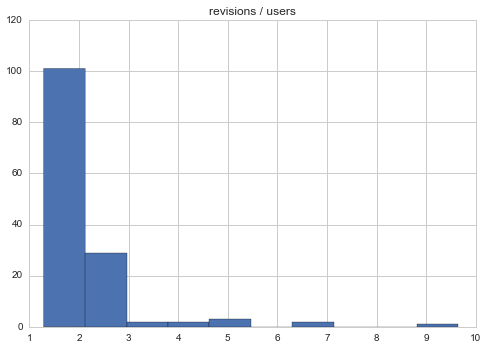

In [16]:
table.hist("revisions / users")

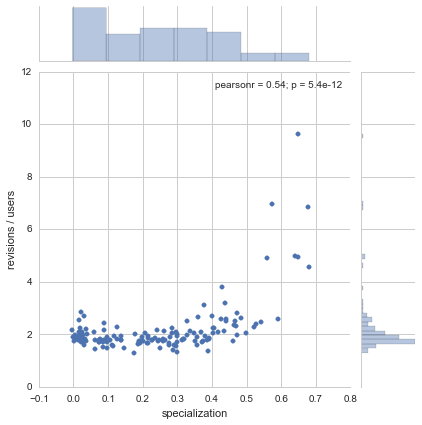

In [17]:
sns.jointplot(table.specialization, table["revisions / users"])

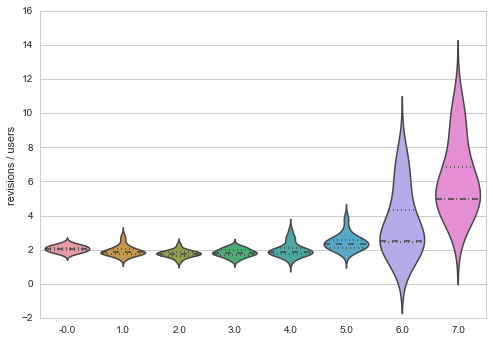

In [18]:
sns.violinplot(table["revisions / users"], [ math.ceil(x * 10) for x in table["specialization"]])